In [1]:
# Dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import matplotlib.cm as cm
import scipy.stats as st
import scipy.stats as stats

### Manipulating the Data Using Pandas

In [2]:
# Open CSV
pipeline_data = pd.read_csv('C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Resources\\Pipeline_CSV.csv')
pipelineDF = pd.DataFrame(pipeline_data)
pipelineDF

,Region,Market,Territory,Account Name,Business Unit,ADESA OFFERED,TR Listed,Sold,Bought,New Sellers,New Buyers,TR Bidders
0,East,E.20,E.20.1,LMJ USED AUTOS LLC,TR,0,0,0,0,No,No,1
1,South,S.12,S.12.4,RIVERSIDE CHEVROLET,TR,0,0,0,0,No,No,0
2,East,E.4,E.4.1,EUROK,TR,0,0,0,1,No,No,1
3,West,W.3,W.3.3,Auto Connect Inc,TR,0,0,0,0,No,No,3
4,East,E.4,E.4.3,BOSTON ROAD AUTO MALL 2,TR,0,0,0,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
30023,zCorporate + International,zCorporate + International,zCorporate + International,WANTCAR INC,ADESA,37,0,15,0,No,No,0
30024,zCorporate + International,zCorporate + International,zCorporate + International,WEST AUTO SALES INC,ADESA,0,0,0,1,No,No,0
30025,zCorporate + International,zCorporate + International,zCorporate + International,WEST COAST MOTOR SALES & LEASING CORP,ADESA,6,0,6,0,No,No,0
30026,zCorporate + International,zCorporate + International,zCorporate + International,WEST MOTOR COMPANY INC,ADESA,0,0,0,1,No,No,0


In [3]:
# Create TR Dataframe
tr = pipelineDF.loc[(pipelineDF["Business Unit"] == "TR")]
tr

,Region,Market,Territory,Account Name,Business Unit,ADESA OFFERED,TR Listed,Sold,Bought,New Sellers,New Buyers,TR Bidders
0,East,E.20,E.20.1,LMJ USED AUTOS LLC,TR,0,0,0,0,No,No,1
1,South,S.12,S.12.4,RIVERSIDE CHEVROLET,TR,0,0,0,0,No,No,0
2,East,E.4,E.4.1,EUROK,TR,0,0,0,1,No,No,1
3,West,W.3,W.3.3,Auto Connect Inc,TR,0,0,0,0,No,No,3
4,East,E.4,E.4.3,BOSTON ROAD AUTO MALL 2,TR,0,0,0,0,No,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...
17679,West,W.5,W.5.1,TUCSON SUBARU,TR,0,0,0,0,No,No,0
17680,Central,C.17,C.17.2,QUEEN CITY MOTORS,TR,0,0,0,0,No,No,0
17681,South,S.10,S.10.5,CRAIN BUICK GMC OF SPRINGDALE,TR,0,0,0,0,No,No,0
17682,West,W.2,W.2.5,AUTO SOURCE,TR,0,0,0,0,No,No,0


In [4]:
# Create TR Dataframe

TRDF = pd.DataFrame({
    "Territory" :tr["Territory"],
    "TR Listed" : tr["TR Listed"],
    "TR Sold" : tr["Sold"],
    "TR Bought" : tr["Bought"],
    "TR Bids" : tr["TR Bidders"],
    "TR Sellers": tr["New Sellers"],
    "TR Buyers": tr["New Buyers"]
})
TRDF

,Territory,TR Listed,TR Sold,TR Bought,TR Bids,TR Sellers,TR Buyers
0,E.20.1,0,0,0,1,No,No
1,S.12.4,0,0,0,0,No,No
2,E.4.1,0,0,1,1,No,No
3,W.3.3,0,0,0,3,No,No
4,E.4.3,0,0,0,0,No,No
...,...,...,...,...,...,...,...
17679,W.5.1,0,0,0,0,No,No
17680,C.17.2,0,0,0,0,No,No
17681,S.10.5,0,0,0,0,No,No
17682,W.2.5,0,0,0,0,No,No


In [5]:
#Add Regions in order to group by region
TRDF = pd.DataFrame({
  "Region" :tr["Region"],
    "Territory" :tr["Territory"],
    "TR Listed" : tr["TR Listed"],
    "TR Sold" : tr["Sold"],
    "TR Bought" : tr["Bought"],
    "TR Bids" : tr["TR Bidders"],
    "TR Sellers": tr["New Sellers"],
    "TR Buyers": tr["New Buyers"]
})
TRDF

,Region,Territory,TR Listed,TR Sold,TR Bought,TR Bids,TR Sellers,TR Buyers
0,East,E.20.1,0,0,0,1,No,No
1,South,S.12.4,0,0,0,0,No,No
2,East,E.4.1,0,0,1,1,No,No
3,West,W.3.3,0,0,0,3,No,No
4,East,E.4.3,0,0,0,0,No,No
...,...,...,...,...,...,...,...,...
17679,West,W.5.1,0,0,0,0,No,No
17680,Central,C.17.2,0,0,0,0,No,No
17681,South,S.10.5,0,0,0,0,No,No
17682,West,W.2.5,0,0,0,0,No,No


In [6]:
#groupby to display the data by region and territory
TR_TerritoryDFSumListed = TRDF.groupby(["Region","Territory"]).sum()["TR Listed"]
TR_TerritoryDFSumSold = TRDF.groupby(["Region","Territory"]).sum()["TR Sold"]
TR_TerritoryDFSumBought = TRDF.groupby(["Region","Territory"]).sum()["TR Bought"]
TR_TerritoryDFSumBidders = TRDF.groupby(["Region","Territory"]).sum()["TR Bids"]

In [7]:
# Identify new buyers and new sellers
locTRSellers = TRDF.loc[(TRDF["TR Sellers"] != "No")]
locTRBuyers = TRDF.loc[(TRDF["TR Buyers"] != "No")]

In [8]:
#Add new buyers and sellers into dataframe
TRDF_final = pd.DataFrame({
     
    "TR Listed": TR_TerritoryDFSumListed,
    "TR Sold": TR_TerritoryDFSumSold,
    "TR Bought": TR_TerritoryDFSumBought,
    "TR Bids": TR_TerritoryDFSumBidders
})
TRDF_final = TRDF_final.reset_index()
TRDF_final


,Region,Territory,TR Listed,TR Sold,TR Bought,TR Bids
0,Central,C.13.1,28,19,15,133
1,Central,C.13.2,0,0,16,124
2,Central,C.13.3,17,6,20,143
3,Central,C.13.4,39,19,18,259
4,Central,C.15.0,0,0,0,0
...,...,...,...,...,...,...
116,West,W.6.2,10,0,0,4
117,West,W.6.3,0,0,1,72
118,West,W.6.4,23,11,14,96
119,West,W.6.5,4,0,0,50


In [9]:
# Identify new buyers and new sellers
newLocTRS = locTRSellers.groupby(["Territory",]).count()["TR Sellers"].reset_index()
newLocTRB = locTRBuyers.groupby(["Territory"]).count()["TR Buyers"].reset_index()

# Merge newLocTRS/TRB into the TRDF_final DataFrame to get complete listing with 121 rows containing new buyers/sellers
TRNewDealers = pd.merge(newLocTRS,newLocTRB,how="outer",on="Territory").rename(columns={"TR Sellers":"Count TR New Sellers","TR Buyers":"Count TR New Buyers"})
TRDF_complete = TRDF_final.merge(TRNewDealers,how="left",on="Territory")
TRDF_complete

,Region,Territory,TR Listed,TR Sold,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
0,Central,C.13.1,28,19,15,133,3.0,3.0
1,Central,C.13.2,0,0,16,124,1.0,NaN
2,Central,C.13.3,17,6,20,143,NaN,NaN
3,Central,C.13.4,39,19,18,259,4.0,2.0
4,Central,C.15.0,0,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...
116,West,W.6.2,10,0,0,4,NaN,1.0
117,West,W.6.3,0,0,1,72,8.0,4.0
118,West,W.6.4,23,11,14,96,6.0,NaN
119,West,W.6.5,4,0,0,50,NaN,NaN


In [10]:
# Insert Conversion - do not run more than once
TRConversion = (TRDF_complete["TR Sold"] / TRDF_complete["TR Listed"] * 100).round(2)
TRDF_complete.insert(3,"Conversion",TRConversion,True)
TRDF_complete

,Region,Territory,TR Listed,Conversion,TR Sold,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
0,Central,C.13.1,28,67.86,19,15,133,3.0,3.0
1,Central,C.13.2,0,NaN,0,16,124,1.0,NaN
2,Central,C.13.3,17,35.29,6,20,143,NaN,NaN
3,Central,C.13.4,39,48.72,19,18,259,4.0,2.0
4,Central,C.15.0,0,NaN,0,0,0,NaN,NaN
...,...,...,...,...,...,...,...,...,...
116,West,W.6.2,10,0.00,0,0,4,NaN,1.0
117,West,W.6.3,0,NaN,0,1,72,8.0,4.0
118,West,W.6.4,23,47.83,11,14,96,6.0,NaN
119,West,W.6.5,4,0.00,0,0,50,NaN,NaN


In [11]:
# creating new series grouped by region
TR_RegionDFSumListed = TRDF.groupby(["Region"]).sum()["TR Listed"]
TR_RegionDFSumSold = TRDF.groupby(["Region"]).sum()["TR Sold"]
TR_RegionDFSumBought = TRDF.groupby(["Region"]).sum()["TR Bought"]
TR_RegionDFSumBidders = TRDF.groupby(["Region"]).sum()["TR Bids"]

In [12]:
# Creating new dataframe grouped by region
TRDF_Region = pd.DataFrame({
     
    "TR Listed": TR_RegionDFSumListed,
    "TR Sold": TR_RegionDFSumSold,
    "TR Bought": TR_RegionDFSumBought,
    "TR Bids": TR_RegionDFSumBidders
})
TRDF_Region

,TR Listed,TR Sold,TR Bought,TR Bids
Region,,,,
Central,828,488,656,5611
East,1480,951,787,7320
South,839,529,537,5402
West,428,215,224,2419
zCorporate + International,84,22,1,1


In [13]:
# Group New Buyers/Seller by Region
newRLocTRS = locTRSellers.groupby(["Region"]).count()["TR Sellers"].reset_index()
newRLocTRB = locTRBuyers.groupby(["Region"]).count()["TR Buyers"].reset_index()

# Merge newLocTRS/TRB into the TRDF_final DataFrame to get complete listing with 121 rows containing new buyers/sellers
TRNewRDealers = pd.merge(newRLocTRS,newRLocTRB,how="outer",on="Region").rename(columns={"TR Sellers":"Count TR New Sellers","TR Buyers":"Count TR New Buyers"})
TRDF_ultimate = TRDF_Region.merge(TRNewRDealers,how="left",on="Region")
TRDF_ultimate

,Region,TR Listed,TR Sold,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
0,Central,828,488,656,5611,62.0,41.0
1,East,1480,951,787,7320,42.0,74.0
2,South,839,529,537,5402,49.0,32.0
3,West,428,215,224,2419,49.0,37.0
4,zCorporate + International,84,22,1,1,NaN,NaN


In [14]:
# Insert Conversion to Region table - do not run more than once
TRRConversion = (TRDF_ultimate["TR Sold"] / TRDF_ultimate["TR Listed"] * 100).round(2)
TRDF_ultimate.insert(3,"Conversion",TRRConversion,True)
TRDF_ultimate

,Region,TR Listed,TR Sold,Conversion,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
0,Central,828,488,58.94,656,5611,62.0,41.0
1,East,1480,951,64.26,787,7320,42.0,74.0
2,South,839,529,63.05,537,5402,49.0,32.0
3,West,428,215,50.23,224,2419,49.0,37.0
4,zCorporate + International,84,22,26.19,1,1,NaN,NaN


### Plotting the Data With MatPlotLib and Pandas

### Question #1: Conversion Rates

In [15]:
#created variables to store values for plots
sizeList = TRDF_ultimate["Conversion"]
amountListedList = TRDF_ultimate["TR Listed"]
amountSoldList = TRDF_ultimate["TR Sold"]

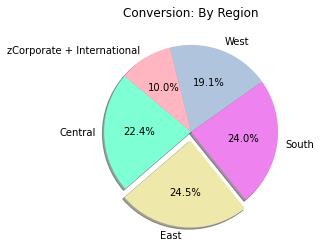

In [16]:
#Created a pie chart to show which regions have the highest and lowest conversion rates - first research question
conversionPie = plt.figure()
labels = ["Central", "East", "South", "West", "zCorporate + International"]
sizes = sizeList
scplt_colors = ["aquamarine", "palegoldenrod", "violet", "lightsteelblue", "lightpink"]
explode = (0, 0.1, 0, 0, 0)
plt.title("Conversion: By Region")

plt.pie(sizes, explode=explode, labels=labels, colors=scplt_colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\conversion_rates_by_region")
plt.show()

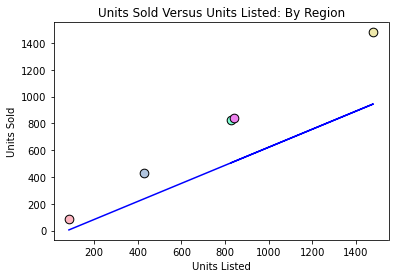

The correlation between both factors is 1.0.


In [52]:
#Created a scatter plot in order to chart linear regression
conversionScatter = plt.figure()
numberListed = TRDF_ultimate.iloc[:,1]
numberSold = TRDF_ultimate.iloc[:,2] 
x_values = numberListed
y_values = numberSold
plt.title("Units Sold Versus Units Listed: By Region")
plt.xlabel('Units Listed')
plt.ylabel('Units Sold')
t = numberSold

#Calculated correlation 
correlation = st.pearsonr(numberSold, numberListed)


# #Calculated linear regression and charted on plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-") 
plt.annotate(line_eq, (10,80), fontsize=14, color="blue")


i = 0
for x in numberListed:
    plt.scatter(x, numberListed[i],s=75, c=scplt_colors[i], edgecolors='black')
    i += 1
    
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\units_sold_versus_units_listed_by_region")
plt.show()
    
#print out correlation
print(f"The correlation between both factors is {round(correlation[0],2)}.")

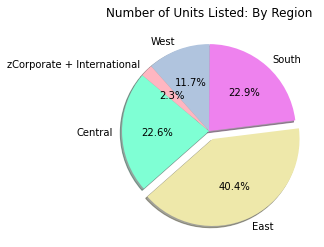

In [18]:
#Created a pie chart to show which regions have the highest amount listed - first question
listedPie = plt.figure()
labels = ["Central", "East", "South", "West", "zCorporate + International"]
sizes = amountListedList
colors = ["aquamarine", "palegoldenrod", "violet", "lightsteelblue", "lightpink"]
explode = (0, 0.1, 0, 0, 0)
plt.title("Number of Units Listed: By Region")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\number_of_units_listed_by_region")
plt.show()

### Question # 2: Conversion Rates Versus Units Sold

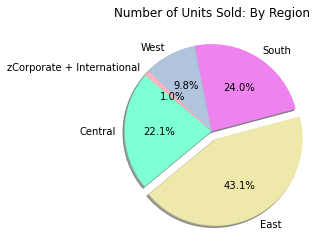

In [19]:
#Created a pie chart to show which regions have the highest amount sold - second question
soldPie = plt.figure()
labels = ["Central", "East", "South", "West", "zCorporate + International"]
sizes = amountSoldList
colors = ["aquamarine", "palegoldenrod", "violet", "lightsteelblue", "lightpink"]
explode = (0, 0.1, 0, 0, 0)
plt.title("Number of Units Sold: By Region")

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\number_of_units_sold_by_region")
plt.show()

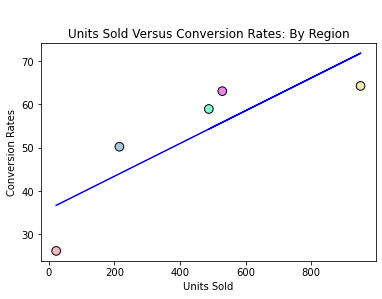

The correlation between both factors is 0.85.


In [20]:
#Created a scatter plot in order to chart linear regression for units sold - second question
unitsSoldScatter = plt.figure()
unitsSold = TRDF_ultimate.iloc[:,2]
conRates = TRDF_ultimate.iloc[:,3] 
x_values = unitsSold
y_values = conRates
plt.title("Units Sold Versus Conversion Rates: By Region")
plt.xlabel('Units Sold')
plt.ylabel('Conversion Rates')
t = y_values

#Calculated correlation 
correlation = st.pearsonr(unitsSold, conRates)


# #Calculated linear regression and charted on plot
#scplt_colors_1 = ["aquamarine","violet","lightsteelblue"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-") 
plt.annotate(line_eq, (10,80), fontsize=14, color="green")
plt.scatter(unitsSold, conRates, s=75, c=scplt_colors, edgecolors='black')
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\units_sold_versus_conversion_by_region")
plt.show()

#print out correlation
print(f"The correlation between both factors is {round(correlation[0],2)}.")

In [21]:
#DataFrame in order to go from the general(Regions) to the specific(Territories), and show some plots by territory
#- second question
TRConversion_by_territory_only = ((TRDF_complete["TR Sold"] / TRDF_complete["TR Listed"]) * 100)
TRDF_complete_by_territory_only = TRDF_complete
TRDF_complete_by_territory_only.head(2)

,Region,Territory,TR Listed,Conversion,TR Sold,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
0,Central,C.13.1,28,67.86,19,15,133,3.0,3.0
1,Central,C.13.2,0,NaN,0,16,124,1.0,NaN


In [22]:
#dropped Nan values in order to plot conversion rates
TRDF_complete_by_territory_for_plot = TRDF_complete_by_territory_only.dropna()
TRDF_complete_by_territory_for_plot.head(2)

,Region,Territory,TR Listed,Conversion,TR Sold,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
0,Central,C.13.1,28,67.86,19,15,133,3.0,3.0
3,Central,C.13.4,39,48.72,19,18,259,4.0,2.0


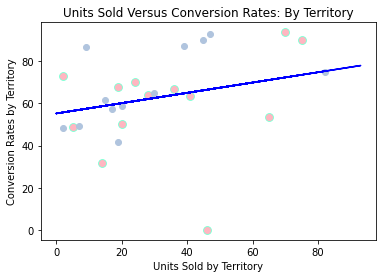

The correlation between both factors is 0.17.


In [23]:
#Created a scatter plot in order to chart linear regression for units sold by territory versus conversion rates
#- second question

territoriesSoldScatter = plt.figure()
tunitsSold = TRDF_complete_by_territory_for_plot.iloc[:,4]
tconRates = TRDF_complete_by_territory_for_plot.iloc[:,3] 
tRegions = TRDF_complete_by_territory_for_plot.iloc[:,0]
x_values = tunitsSold
y_values = tconRates
plt.title("Units Sold Versus Conversion Rates: By Territory")
plt.xlabel('Units Sold by Territory')
plt.ylabel('Conversion Rates by Territory')
t = y_values

# #Calculated correlation 
correlation = st.pearsonr(tunitsSold, tconRates)


#Calculated linear regression and charted on plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-") 
plt.annotate(line_eq, (40,100), fontsize=14, color="blue")

# Color by region
i = 0
for x in x_values:
    try:
        if tRegions[i] == "Central":
            plt.scatter(x, y_values[i], c=scplt_colors[0], s=60,edgecolors = scplt_colors[0])
        if tRegions[i] == "West":
            plt.scatter(x, y_values[i], c=scplt_colors[1], s=60,edgecolors = scplt_colors[1])
        if tRegions[i] == "South":
            plt.scatter(x, y_values[i], c=scplt_colors[2], s=60,edgecolors = scplt_colors[2])
        if tRegions[i] == "East":
            plt.scatter(x, y_values[i], c=scplt_colors[3])
        else:
            plt.scatter(x, y_values[i], c=scplt_colors[4])
        i += 1
    except:
        i += 1

plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\units_sold_versus_conversion_by_territory")
plt.show()




#print out correlation
print(f"The correlation between both factors is {round(correlation[0],2)}.")

### Question #3: Amount Bid versus Amount Sold

In [24]:
#to see what we are working with to create a plot for bids by region -- third question
TRDF_ultimate.head(2)

,Region,TR Listed,TR Sold,Conversion,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
0,Central,828,488,58.94,656,5611,62.0,41.0
1,East,1480,951,64.26,787,7320,42.0,74.0


In [25]:
#set index so bar chart has proper labels on x axis
TRDF_bids = TRDF_ultimate
TRDF_bids = TRDF_bids.set_index(TRDF_bids["Region"])
TRDF_bids.head((10))

,Region,TR Listed,TR Sold,Conversion,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
Region,,,,,,,,
Central,Central,828,488,58.94,656,5611,62.0,41.0
East,East,1480,951,64.26,787,7320,42.0,74.0
South,South,839,529,63.05,537,5402,49.0,32.0
West,West,428,215,50.23,224,2419,49.0,37.0
zCorporate + International,zCorporate + International,84,22,26.19,1,1,NaN,NaN


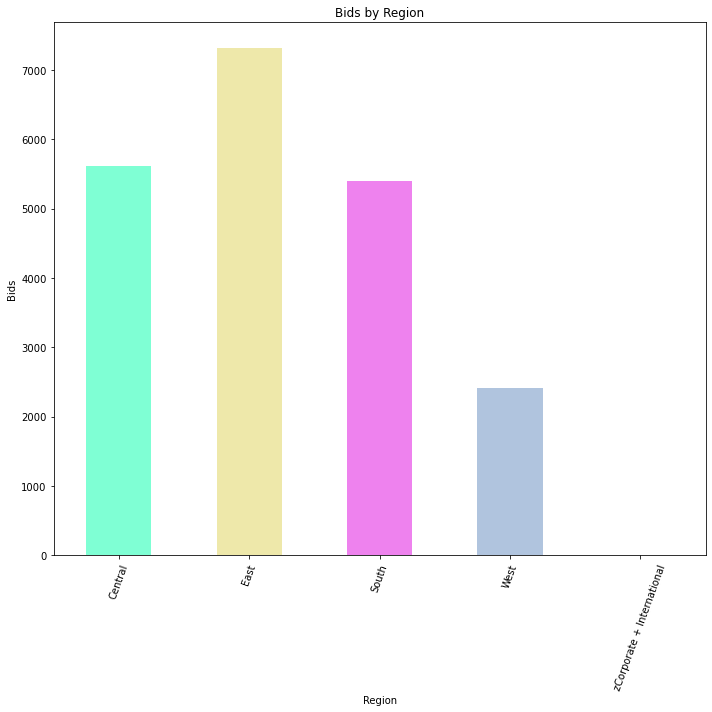

In [26]:
#Created bar plot for bids by region - third question
bidsBar = plt.figure()
colors = ["aquamarine", "palegoldenrod", "violet", "lightsteelblue", "lightpink"]
TRDF_bids["TR Bids"].plot.bar(align="center", color=scplt_colors, figsize=(10,10))
plt.title("Bids by Region")
plt.ylabel("Bids")
plt.xlabel("Region")
plt.xticks(rotation=70)
plt.tight_layout()
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\bids_by_region")
plt.show()

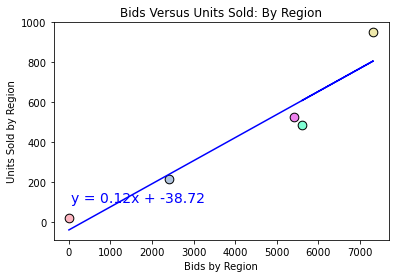

The correlation between both factors is 0.17.


In [27]:
#Created scatter to show relationship between bids and unitws sold, by region - third question
bidsVersusSoldScatter = plt.figure()
unitsBid = TRDF_bids.iloc[:,5]
bVunitsSold = TRDF_bids.iloc[:,2] 
x_values = unitsBid
y_values = bVunitsSold
plt.title("Bids Versus Units Sold: By Region")
plt.xlabel('Bids by Region')
plt.ylabel('Units Sold by Region')
t = y_values

# #Calculated correlation 
correlation = st.pearsonr(tunitsSold, tconRates)


#Calculated linear regression and charted on plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-") 
plt.annotate(line_eq, (40,100), fontsize=14, color="blue")

i = 0
for x in unitsBid:
    plt.scatter(x, bVunitsSold[i], s=75, c=scplt_colors[i], edgecolors='black')
    i += 1
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\bids_versus_units_sold_by_region")
plt.show()

#print out correlation
print(f"The correlation between both factors is {round(correlation[0],2)}.")

In [28]:
##to see what we are working with to create a plot for bids by territory -- third question
TRDF_complete_by_territory_only.head(2)

,Region,Territory,TR Listed,Conversion,TR Sold,TR Bought,TR Bids,Count TR New Sellers,Count TR New Buyers
0,Central,C.13.1,28,67.86,19,15,133,3.0,3.0
1,Central,C.13.2,0,NaN,0,16,124,1.0,NaN


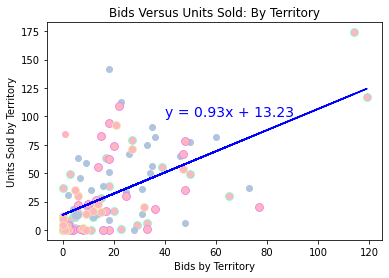

The correlation between both factors is 0.17.


In [29]:
#Created scatter to show relationship between bids and unitws sold, by territory - third question
tbidsVersusSoldScatter = plt.figure()
tunitsBid = TRDF_complete_by_territory_only.iloc[:,5]
tbVunitsSold = TRDF_complete_by_territory_only.iloc[:,2] 
tunitsTerritory = TRDF_complete_by_territory_only.iloc[:,0] 
x_values = tunitsBid
y_values = tbVunitsSold
plt.title("Bids Versus Units Sold: By Territory")
plt.xlabel('Bids by Territory')
plt.ylabel('Units Sold by Territory')
t = y_values

# #Calculated correlation 
correlation = st.pearsonr(tunitsSold, tconRates)


#Calculated linear regression and charted on plot
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(x_values,regress_values,"b-") 
plt.annotate(line_eq, (40,100), fontsize=14, color="blue")

# Color by region
i = 0
for x in tunitsBid:
    if tunitsTerritory[i] == "Central":
        plt.scatter(x, tbVunitsSold[i], c=scplt_colors[0], s=60,edgecolors = scplt_colors[0])
    if tunitsTerritory[i] == "West":
        plt.scatter(x, tbVunitsSold[i], c=scplt_colors[1], s=60,edgecolors=scplt_colors[1])
    if tunitsTerritory[i] == "South":
        plt.scatter(x, tbVunitsSold[i], c=scplt_colors[2], s=60, edgecolors=scplt_colors[2])
    if tunitsTerritory[i] == "East":
        plt.scatter(x, tbVunitsSold[i], c=scplt_colors[3])
    else:
        plt.scatter(x, tbVunitsSold[i], c=scplt_colors[4])
    i += 1
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\bids_versus_units_sold_by_territory")
plt.show()

#print out correlation
print(f"The correlation between both factors is {round(correlation[0],2)}.")

In [30]:
# Calculate the IQR and quantitatively determine if there are any potential outliers, third question

In [31]:
# Put regions into a list for for loop (and later for plot labels)
regionsList = TRDF_ultimate["Region"].to_list()
regionsList

['Central', 'East', 'South', 'West', 'zCorporate + International']

In [32]:
# Create empty list to fill with TR Bids data (for plotting)
bidList = []

In [33]:
for j in regionsList:
    region_series = TRDF_complete.loc[TRDF_complete["Region"] == j]["TR Bids"]
    bidList.append(region_series)
    quartiles = region_series.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{j} potential outliers: {region_series.loc[(region_series < lower_bound) | (region_series > upper_bound)]}")  

Central potential outliers: 18    538
19    837
24    820
Name: TR Bids, dtype: int64
East potential outliers: 59    645
Name: TR Bids, dtype: int64
South potential outliers: Series([], Name: TR Bids, dtype: int64)
West potential outliers: 103    467
104    427
Name: TR Bids, dtype: int64
zCorporate + International potential outliers: Series([], Name: TR Bids, dtype: int64)


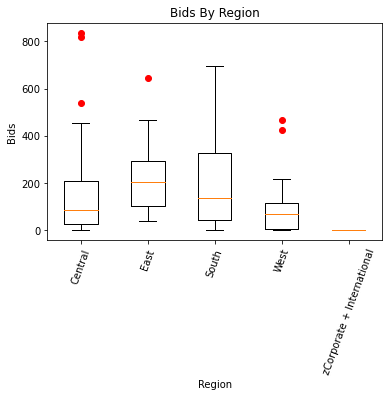

In [34]:
fig1, ax1 = plt.subplots()
ax1.set_title('Bids By Region')
ax1.set_ylabel('Bids')
ax1.set_xlabel('Region')
ax1.boxplot(bidList, labels = regionsList, sym='r')
plt.xticks(rotation=70)
plt.savefig("C:\\Users\\me\\Desktop\\BBC\\COPY_but-ind-data-pt-06-2020-u-c\\Unit_7_Project_1\\Group Project\\Project-1-Group-2\\Images\\bids_by_region_outliers")
plt.show()

In [35]:
centralAverage = TRDF_complete.loc[(TRDF_complete["Region"] == "Central")]["TR Bids"].mean()
eastAverage = TRDF_complete.loc[(TRDF_complete["Region"] == "East")]["TR Bids"].mean()
southAverage = TRDF_complete.loc[(TRDF_complete["Region"] == "South")]["TR Bids"].mean()
westAverage = TRDF_complete.loc[(TRDF_complete["Region"] == "West")]["TR Bids"].mean()
zAverage = TRDF_complete.loc[(TRDF_complete["Region"] == "zCorporate + International")]["TR Bids"].mean()
overallAverage = TRDF_complete["TR Bids"].mean(skipna = True)

In [36]:
averageTRDFBids = pd.DataFrame({"Central": centralAverage,
                            "East": eastAverage,
                            "South": southAverage,
                            "West": westAverage,
                            "zCorporate + International": zAverage,
                            "Overall": overallAverage             
                           }, index=[0])
averageTRDFBids

,Central,East,South,West,zCorporate + International,Overall
0,170.030303,215.294118,200.074074,93.038462,1.0,171.512397


In [37]:
averageTRDFBids["Central"] = averageTRDFBids["Central"].astype(float).map("{:,.2f}".format) 
averageTRDFBids["East"] = averageTRDFBids["East"].astype(float).map("{:,.2f}".format) 
averageTRDFBids["South"] = averageTRDFBids["South"].astype(float).map("{:,.2f}".format) 
averageTRDFBids["West"] = averageTRDFBids["West"].astype(float).map("{:,.2f}".format) 
averageTRDFBids["zCorporate + International"] = averageTRDFBids["zCorporate + International"].astype(float).map("{:,.2f}".format) 
averageTRDFBids["Overall"] = averageTRDFBids["Overall"].astype(float).map("{:,.2f}".format) 

In [38]:
averageTRDFBids

,Central,East,South,West,zCorporate + International,Overall
0,170.03,215.29,200.07,93.04,1.00,171.51


In [39]:
#ANOVA: Bids by Region
# Extract individual groups
group1 = TRDF_complete[TRDF_complete["Region"] == "Central"]["TR Bids"]
group2 = TRDF_complete[TRDF_complete["Region"] == "East"]["TR Bids"]
group3 = TRDF_complete[TRDF_complete["Region"] == "South"]["TR Bids"]
group4 = TRDF_complete[TRDF_complete["Region"] == "West"]["TR Bids"]
group5 = TRDF_complete[TRDF_complete["Region"] == "zCorporate + International"]["TR Bids"]

In [40]:
# Perform the ANOVA
stats.f_oneway(group1, group2, group3, group4, group5)

F_onewayResult(statistic=2.271310405215896, pvalue=0.06571616652263343)

In [41]:
#chi-squared test by region

In [42]:
#variables for Chi Square Test
regionForChiiList = TRDF_ultimate["Region"].to_list()
regionForChiiList

['Central', 'East', 'South', 'West', 'zCorporate + International']

In [43]:
#variables for Chi Square Test
bidsForChiiList = TRDF_ultimate["TR Bids"].to_list()
bidsForChiiList

[5611, 7320, 5402, 2419, 1]

In [44]:
# Observed data 
observed = pd.Series(bidsForChiiList, index=[regionForChiiList])
observed

Central                       5611
East                          7320
South                         5402
West                          2419
zCorporate + International       1
dtype: int64

In [45]:
# Create a data frame
chiCalc = pd.DataFrame([observed]).T
chiCalc

,0
Central,5611
East,7320
South,5402
West,2419
zCorporate + International,1


In [46]:
#to get the expected number
expectedSum = observed.sum()
expected = expectedSum / 5
expected

4150.6

In [47]:
chiCalc[1] = expected

In [48]:
# Rename columns
chiCalc.columns = ["observed", "expected"]
chiCalc

,observed,expected
Central,5611,4150.6
East,7320,4150.6
South,5402,4150.6
West,2419,4150.6
zCorporate + International,1,4150.6


In [49]:
# The degree of freedom is 5-1 = 4
# With a p-value of 0.05, the confidence level is 1.00-0.05 = 0.95.
critical_value = stats.chi2.ppf(q = 0.95, df = 4)

In [50]:
# The critical value
critical_value

9.487729036781154

In [51]:
# Run the Chi Square Test with stats.chisquare()
stats.chisquare(chiCalc['observed'], chiCalc['expected'])

Power_divergenceResult(statistic=8182.307425432467, pvalue=0.0)